In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from matplotlib.cm import rainbow
import collections
from tqdm import tqdm_notebook as tqdm
import scipy.stats as sps
import pickle

import tensorflow as tf
import tensorflow_probability as tfp
from IPython.display import clear_output

%matplotlib inline

np.seterr(all='raise')
tfd = tfp.distributions


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
from datasets import *

In [2]:
from basic_solutions import *

#evaluate(stupid_solution, data_set_small.train_data[0], data_set_small.val_data[0], data_set_small.ideal[0], data_set_small.L)

In [5]:
import pickle

In [4]:
! ls 

10_10				     datasets.py
10_120				     f
10_30				     graph_params.png
10_300				     hmc
10_70				     hmc-all01.ipynb
=1.12.0				     hmc_burnin_size.ipynb
120_10				     hmc-Copy1.ipynb
120_120				     hmc.ipynb
120_30				     hmc_sampling.ipynb
120_300				     hmc-stress.ipynb
120_70				     Kolesnikov-2012-master-thesis(1).pdf
18-AUTOML-RGPE.pdf		     max_loglike_method_generation-Copy1.ipynb
300_10				     max_loglike_method_generation.ipynb
300_120				     methods_and_compare_generation-Copy1.ipynb
300_30				     methods_and_compare_generation.ipynb
300_300				     methods_and_compare_grid.ipynb
300_70				     methods_and_compare_lab.ipynb
30_10				     plot_calibration_curve.ipynb
30_120				     plot_calibration_curve-MY.ipynb
30_30				     Popovkin_task_defence_2.0.pdf
30_300				     pracanalHW6-normal-dataset.ipynb
30_70				     ps_model(1).ipynb
70_10				     ps_model(2)-Copy1.ipynb
70_120				     ps_model(2).ipynb
70_30				     __pycache__
70_300				     RW5.pdf
70_70			

In [100]:
d = None
with open("300_30", "rb") as f:
    d = pickle.load(f)
d = d[2]
data = d

0.0016807983155377956 0.1876086457136562
0.0016719146302272044 0.1877261229464081
0.0017728790248595341 0.18796558436307317


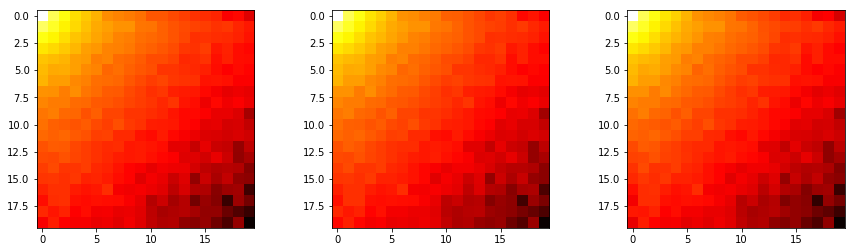

In [101]:
plt.figure(figsize=(15, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    d = data[:,:,i].copy()
    print (d.min(), d.max())
    d -= d.min() - 1e-4
    d /= d.max()
    d = np.log(d)
    plt.imshow(d, cmap='hot', interpolation='nearest')
plt.show()

-8.35502832391942e-05 0.0011479658499304914


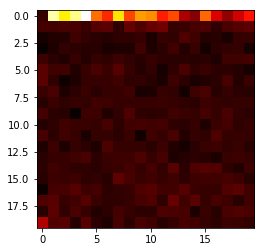

-0.9242899803348781 0.9242899803348781


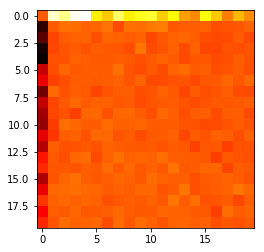

In [102]:
plt.figure(figsize=(5, 4))
d = data[:,:,1] - data[:,:,0]
print (d.min(), d.max())
d[0][0] = 0
d -= d.min()
d /= d.max()
plt.imshow(d, cmap='hot', interpolation='nearest')
plt.show()

a = d - d.T
print (a.min(), a.max())
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()